In [ ]:
!pip install -r requirements.txt

In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')



Num GPUs Available:  1


# I. Load in the Data

In [2]:
#define image dataset 
#why do we rescale?
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=4,
                                                 directory='data_cleaned/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=4,
                                                 directory='data_cleaned/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

#Organize data for our predictions 
image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory='data_cleaned/scraped_images',
                                                 shuffle=False,
                                                 target_size=(224, 224), 
                                                 class_mode=None)

Found 430 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


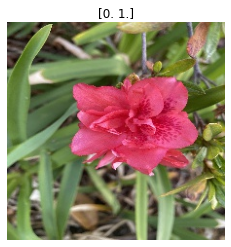

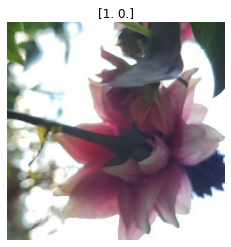

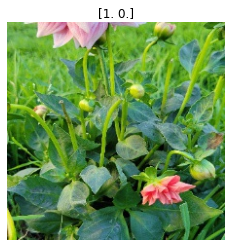

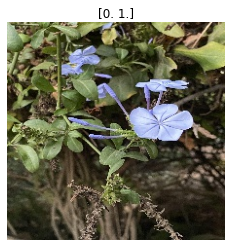

In [3]:
#show flwoers for the first batch

batch_1_img = train_dataset[0]
for i in range(0,4):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

# II. Build First ANN

In [4]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [224, 224,3]),                             
keras.layers.Dense(300, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(2, activation = 'softmax')])

model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#data manipulation 
#include graphs 

Epoch 1/20
108/108 [==============================] - 3s 17ms/step - loss: 4.1080 - accuracy: 0.6419 - val_loss: 3.6763 - val_accuracy: 0.7075
Epoch 2/20
108/108 [==============================] - 1s 12ms/step - loss: 0.6760 - accuracy: 0.7791 - val_loss: 0.3913 - val_accuracy: 0.9434
Epoch 3/20
108/108 [==============================] - 1s 11ms/step - loss: 0.4576 - accuracy: 0.8163 - val_loss: 0.5432 - val_accuracy: 0.7075
Epoch 4/20
108/108 [==============================] - 1s 11ms/step - loss: 0.4564 - accuracy: 0.8023 - val_loss: 0.8696 - val_accuracy: 0.3491
Epoch 5/20
108/108 [==============================] - 1s 11ms/step - loss: 0.5285 - accuracy: 0.6651 - val_loss: 0.6880 - val_accuracy: 0.7075


In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
#simple ann with 3 layers 
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [224, 224,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(2, activation = 'softmax')])


model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#data manipulation 
#include graphs 

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
model.predict(submission)

# III. Build Convolutional Neural Net

In [112]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [224, 224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation ='softmax')])

In [113]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [114]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#early stopping

Epoch 1/20
108/108 [==============================] - 2s 14ms/step - loss: 0.6374 - accuracy: 0.6977 - val_loss: 0.6795 - val_accuracy: 0.7358
Epoch 2/20
108/108 [==============================] - 1s 11ms/step - loss: 0.3621 - accuracy: 0.8767 - val_loss: 0.5046 - val_accuracy: 0.8302
Epoch 3/20
108/108 [==============================] - 1s 11ms/step - loss: 0.2305 - accuracy: 0.9326 - val_loss: 0.4972 - val_accuracy: 0.8774
Epoch 4/20
108/108 [==============================] - 1s 11ms/step - loss: 0.0963 - accuracy: 0.9744 - val_loss: 0.3878 - val_accuracy: 0.8774
Epoch 5/20
108/108 [==============================] - 1s 11ms/step - loss: 0.0814 - accuracy: 0.9860 - val_loss: 0.6539 - val_accuracy: 0.8679
Epoch 6/20
108/108 [==============================] - 1s 11ms/step - loss: 0.0897 - accuracy: 0.9698 - val_loss: 0.2320 - val_accuracy: 0.9151
Epoch 7/20
108/108 [==============================] - 1s 11ms/step - loss: 0.0322 - accuracy: 0.9977 - val_loss: 0.8582 - val_accuracy: 0.8585

In [115]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

27/27 [==============================] - 0s 8ms/step - loss: 0.2320 - accuracy: 0.9151
Loss:  0.2319602221250534
Accuracy:  0.9150943160057068


### Second CNN

In [8]:
model = keras.models.Sequential([
keras.layers.Conv2D(224, (3, 3), activation='relu', input_shape = [224, 224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation ='softmax')])


In [9]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [10]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#early stopping

Epoch 1/20
108/108 [==============================] - 10s 81ms/step - loss: 0.9392 - accuracy: 0.6977 - val_loss: 0.6586 - val_accuracy: 0.7075
Epoch 2/20
108/108 [==============================] - 8s 73ms/step - loss: 0.6978 - accuracy: 0.7558 - val_loss: 0.5817 - val_accuracy: 0.7075
Epoch 3/20
108/108 [==============================] - 8s 73ms/step - loss: 0.4854 - accuracy: 0.8279 - val_loss: 0.3811 - val_accuracy: 0.8585
Epoch 4/20
108/108 [==============================] - 8s 71ms/step - loss: 0.2781 - accuracy: 0.9070 - val_loss: 0.4421 - val_accuracy: 0.8679
Epoch 5/20
108/108 [==============================] - 8s 73ms/step - loss: 0.1960 - accuracy: 0.9442 - val_loss: 0.3705 - val_accuracy: 0.8396
Epoch 6/20
108/108 [==============================] - 8s 71ms/step - loss: 0.1589 - accuracy: 0.9512 - val_loss: 1.8158 - val_accuracy: 0.7736
Epoch 7/20
108/108 [==============================] - 8s 71ms/step - loss: 0.3971 - accuracy: 0.8953 - val_loss: 0.4145 - val_accuracy: 0.830

In [12]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

27/27 [==============================] - 1s 19ms/step - loss: 0.3705 - accuracy: 0.8396
Loss:  0.37046584486961365
Accuracy:  0.8396226167678833


In [ ]:
model.predict(submission)

# IV. Build Transfer Learning Model

In [98]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [99]:
for layer in vgg.layers:
    layer.trainable = False

In [100]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [101]:
Flatten()(vgg.output)

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten_20')>

In [102]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)

In [103]:
modelvgg.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [104]:
modelvgg.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            restore_best_weights=True)

In [105]:
modelvgg.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)


Epoch 1/20
108/108 [==============================] - 4s 36ms/step - loss: 0.3984 - accuracy: 0.8442 - val_loss: 0.1929 - val_accuracy: 0.9245
Epoch 2/20
108/108 [==============================] - 4s 33ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 0.2102 - val_accuracy: 0.9434
Epoch 3/20
108/108 [==============================] - 4s 33ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.2054 - val_accuracy: 0.9434
Epoch 4/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.1798 - val_accuracy: 0.9528
Epoch 5/20
108/108 [==============================] - 4s 33ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1857 - val_accuracy: 0.9528
Epoch 6/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.1936 - val_accuracy: 0.9528
Epoch 7/20
108/108 [==============================] - 4s 35ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1802 - val_accuracy: 0.9528

In [107]:
loss, accuracy = modelvgg.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

27/27 [==============================] - 1s 30ms/step - loss: 0.1798 - accuracy: 0.9528
Loss:  0.17984075844287872
Accuracy:  0.9528301954269409


#### patience=4
Loss:  0.17658786475658417

Accuracy:  0.9528301954269409

#### patience=5
Loss:  0.18490581214427948

Accuracy:  0.9433962106704712

#### patience=6
Loss:  0.17740312218666077

Accuracy:  0.9433962106704712

In [38]:
modelvgg.predict(submission)

4/4 [==============================] - 3s 96ms/step


array([[8.0368990e-01, 1.9631015e-01],
       [3.7358377e-06, 9.9999630e-01],
       [3.8311788e-01, 6.1688215e-01],
       [7.1273547e-07, 9.9999928e-01],
       [3.6907871e-03, 9.9630922e-01],
       [2.0341273e-02, 9.7965872e-01],
       [2.5015278e-03, 9.9749845e-01],
       [8.0141993e-03, 9.9198580e-01],
       [7.1962900e-02, 9.2803711e-01],
       [1.4352999e-03, 9.9856478e-01],
       [1.8788931e-04, 9.9981219e-01],
       [1.1113314e-04, 9.9988890e-01],
       [1.6159447e-05, 9.9998379e-01],
       [3.3609802e-05, 9.9996638e-01],
       [3.9482591e-05, 9.9996054e-01],
       [2.0087064e-05, 9.9997985e-01],
       [1.8744590e-04, 9.9981254e-01],
       [9.9783891e-01, 2.1611454e-03],
       [4.9492687e-06, 9.9999499e-01],
       [9.9913198e-01, 8.6802937e-04],
       [3.2959852e-07, 9.9999964e-01],
       [1.5347841e-07, 9.9999988e-01],
       [8.5146521e-06, 9.9999154e-01],
       [1.1882683e-04, 9.9988115e-01],
       [9.7674332e-05, 9.9990237e-01],
       [1.1120791e-08, 1.

# V. Create Sample Submission 

In [ ]:
onlyfiles = [f.split('.')[0] for f in os.listdir(os.path.join('data_cleaned/scraped_images/image_files')) if os.path.isfile(os.path.join(os.path.join('data_cleaned/scraped_images/image_files'), f))]
submission_df = pd.DataFrame(onlyfiles, columns =['images'])
submission_df['la_eterna'] = .5
submission_df['other_flower'] = .5
submission_df.head()

In [ ]:
submission_df.to_csv('submission_file.csv', index = False)